# Compositionality & Iconicity - Francijn Keur

Code from Simulating Language, Lab 6, Compositionality from iterated learning - Simon Kirby
similar to simulation in [Kirby et al (2015)](https://www.sciencedirect.com/science/article/pii/S0010027715000815?via%3Dihub)

In [1]:
# import used libraries
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from math import log, log1p, exp, inf
from scipy.special import logsumexp
from scipy.special import logsumexp

In [2]:
meanings = ['02', '03', '12', '13']
signals = ['aa', 'ab', 'ba', 'bb']

In [3]:
# some functions for working with probabilities / logs

def normalize_probs(probs):
    total = sum(probs) #calculates the summed probabilities
    normedprobs = []
    for p in probs:
        normedprobs.append(p / total) 
    return normedprobs

def normalize_logprobs(logprobs):
    """Takes a list of log numbers; returns a list of scaled versions of those numbers that, 
    once converted to probabilities, sum to 1."""
    logtotal = logsumexp(logprobs) #calculates the summed log probabilities
    normedlogs = []
    for logp in logprobs:
        normedlogs.append(logp - logtotal) #normalise - subtracting in the log domain equivalent to divising in the normal domain
    return normedlogs

def log_to_normal_probability(logprob):
    normal_probs = []
    for p in logprob:
        normal_probability = exp(p)
        normal_probs.append(normal_probability)
    return normal_probs

def log_roulette_wheel(normedlogs):
    """Takes a list of normed log probabilities; returns some index of that list 
    with probability corresponding to the (exponentiated) value of that list element"""
    r=log(random.random()) #generate a random number in [0,1), then convert to log
    accumulator = normedlogs[0]
    for i in range(len(normedlogs)):
        if r < accumulator:
            return i
        accumulator = logsumexp([accumulator, normedlogs[i + 1]])

In [4]:
# load in all possible lanugages + log_priors based on coding length + their language type

possible_languages = [[('02', 'aa'), ('03', 'aa'), ('12', 'aa'), ('13', 'aa')], [('02', 'aa'), ('03', 'aa'), ('12', 'aa'), ('13', 'ab')], [('02', 'aa'), ('03', 'aa'), ('12', 'aa'), ('13', 'ba')], [('02', 'aa'), ('03', 'aa'), ('12', 'aa'), ('13', 'bb')], [('02', 'aa'), ('03', 'aa'), ('12', 'ab'), ('13', 'aa')], [('02', 'aa'), ('03', 'aa'), ('12', 'ab'), ('13', 'ab')], [('02', 'aa'), ('03', 'aa'), ('12', 'ab'), ('13', 'ba')], [('02', 'aa'), ('03', 'aa'), ('12', 'ab'), ('13', 'bb')], [('02', 'aa'), ('03', 'aa'), ('12', 'ba'), ('13', 'aa')], [('02', 'aa'), ('03', 'aa'), ('12', 'ba'), ('13', 'ab')], [('02', 'aa'), ('03', 'aa'), ('12', 'ba'), ('13', 'ba')], [('02', 'aa'), ('03', 'aa'), ('12', 'ba'), ('13', 'bb')], [('02', 'aa'), ('03', 'aa'), ('12', 'bb'), ('13', 'aa')], [('02', 'aa'), ('03', 'aa'), ('12', 'bb'), ('13', 'ab')], [('02', 'aa'), ('03', 'aa'), ('12', 'bb'), ('13', 'ba')], [('02', 'aa'), ('03', 'aa'), ('12', 'bb'), ('13', 'bb')], [('02', 'aa'), ('03', 'ab'), ('12', 'aa'), ('13', 'aa')], [('02', 'aa'), ('03', 'ab'), ('12', 'aa'), ('13', 'ab')], [('02', 'aa'), ('03', 'ab'), ('12', 'aa'), ('13', 'ba')], [('02', 'aa'), ('03', 'ab'), ('12', 'aa'), ('13', 'bb')], [('02', 'aa'), ('03', 'ab'), ('12', 'ab'), ('13', 'aa')], [('02', 'aa'), ('03', 'ab'), ('12', 'ab'), ('13', 'ab')], [('02', 'aa'), ('03', 'ab'), ('12', 'ab'), ('13', 'ba')], [('02', 'aa'), ('03', 'ab'), ('12', 'ab'), ('13', 'bb')], [('02', 'aa'), ('03', 'ab'), ('12', 'ba'), ('13', 'aa')], [('02', 'aa'), ('03', 'ab'), ('12', 'ba'), ('13', 'ab')], [('02', 'aa'), ('03', 'ab'), ('12', 'ba'), ('13', 'ba')], [('02', 'aa'), ('03', 'ab'), ('12', 'ba'), ('13', 'bb')], [('02', 'aa'), ('03', 'ab'), ('12', 'bb'), ('13', 'aa')], [('02', 'aa'), ('03', 'ab'), ('12', 'bb'), ('13', 'ab')], [('02', 'aa'), ('03', 'ab'), ('12', 'bb'), ('13', 'ba')], [('02', 'aa'), ('03', 'ab'), ('12', 'bb'), ('13', 'bb')], [('02', 'aa'), ('03', 'ba'), ('12', 'aa'), ('13', 'aa')], [('02', 'aa'), ('03', 'ba'), ('12', 'aa'), ('13', 'ab')], [('02', 'aa'), ('03', 'ba'), ('12', 'aa'), ('13', 'ba')], [('02', 'aa'), ('03', 'ba'), ('12', 'aa'), ('13', 'bb')], [('02', 'aa'), ('03', 'ba'), ('12', 'ab'), ('13', 'aa')], [('02', 'aa'), ('03', 'ba'), ('12', 'ab'), ('13', 'ab')], [('02', 'aa'), ('03', 'ba'), ('12', 'ab'), ('13', 'ba')], [('02', 'aa'), ('03', 'ba'), ('12', 'ab'), ('13', 'bb')], [('02', 'aa'), ('03', 'ba'), ('12', 'ba'), ('13', 'aa')], [('02', 'aa'), ('03', 'ba'), ('12', 'ba'), ('13', 'ab')], [('02', 'aa'), ('03', 'ba'), ('12', 'ba'), ('13', 'ba')], [('02', 'aa'), ('03', 'ba'), ('12', 'ba'), ('13', 'bb')], [('02', 'aa'), ('03', 'ba'), ('12', 'bb'), ('13', 'aa')], [('02', 'aa'), ('03', 'ba'), ('12', 'bb'), ('13', 'ab')], [('02', 'aa'), ('03', 'ba'), ('12', 'bb'), ('13', 'ba')], [('02', 'aa'), ('03', 'ba'), ('12', 'bb'), ('13', 'bb')], [('02', 'aa'), ('03', 'bb'), ('12', 'aa'), ('13', 'aa')], [('02', 'aa'), ('03', 'bb'), ('12', 'aa'), ('13', 'ab')], [('02', 'aa'), ('03', 'bb'), ('12', 'aa'), ('13', 'ba')], [('02', 'aa'), ('03', 'bb'), ('12', 'aa'), ('13', 'bb')], [('02', 'aa'), ('03', 'bb'), ('12', 'ab'), ('13', 'aa')], [('02', 'aa'), ('03', 'bb'), ('12', 'ab'), ('13', 'ab')], [('02', 'aa'), ('03', 'bb'), ('12', 'ab'), ('13', 'ba')], [('02', 'aa'), ('03', 'bb'), ('12', 'ab'), ('13', 'bb')], [('02', 'aa'), ('03', 'bb'), ('12', 'ba'), ('13', 'aa')], [('02', 'aa'), ('03', 'bb'), ('12', 'ba'), ('13', 'ab')], [('02', 'aa'), ('03', 'bb'), ('12', 'ba'), ('13', 'ba')], [('02', 'aa'), ('03', 'bb'), ('12', 'ba'), ('13', 'bb')], [('02', 'aa'), ('03', 'bb'), ('12', 'bb'), ('13', 'aa')], [('02', 'aa'), ('03', 'bb'), ('12', 'bb'), ('13', 'ab')], [('02', 'aa'), ('03', 'bb'), ('12', 'bb'), ('13', 'ba')], [('02', 'aa'), ('03', 'bb'), ('12', 'bb'), ('13', 'bb')], [('02', 'ab'), ('03', 'aa'), ('12', 'aa'), ('13', 'aa')], [('02', 'ab'), ('03', 'aa'), ('12', 'aa'), ('13', 'ab')], [('02', 'ab'), ('03', 'aa'), ('12', 'aa'), ('13', 'ba')], [('02', 'ab'), ('03', 'aa'), ('12', 'aa'), ('13', 'bb')], [('02', 'ab'), ('03', 'aa'), ('12', 'ab'), ('13', 'aa')], [('02', 'ab'), ('03', 'aa'), ('12', 'ab'), ('13', 'ab')], [('02', 'ab'), ('03', 'aa'), ('12', 'ab'), ('13', 'ba')], [('02', 'ab'), ('03', 'aa'), ('12', 'ab'), ('13', 'bb')], [('02', 'ab'), ('03', 'aa'), ('12', 'ba'), ('13', 'aa')], [('02', 'ab'), ('03', 'aa'), ('12', 'ba'), ('13', 'ab')], [('02', 'ab'), ('03', 'aa'), ('12', 'ba'), ('13', 'ba')], [('02', 'ab'), ('03', 'aa'), ('12', 'ba'), ('13', 'bb')], [('02', 'ab'), ('03', 'aa'), ('12', 'bb'), ('13', 'aa')], [('02', 'ab'), ('03', 'aa'), ('12', 'bb'), ('13', 'ab')], [('02', 'ab'), ('03', 'aa'), ('12', 'bb'), ('13', 'ba')], [('02', 'ab'), ('03', 'aa'), ('12', 'bb'), ('13', 'bb')], [('02', 'ab'), ('03', 'ab'), ('12', 'aa'), ('13', 'aa')], [('02', 'ab'), ('03', 'ab'), ('12', 'aa'), ('13', 'ab')], [('02', 'ab'), ('03', 'ab'), ('12', 'aa'), ('13', 'ba')], [('02', 'ab'), ('03', 'ab'), ('12', 'aa'), ('13', 'bb')], [('02', 'ab'), ('03', 'ab'), ('12', 'ab'), ('13', 'aa')], [('02', 'ab'), ('03', 'ab'), ('12', 'ab'), ('13', 'ab')], [('02', 'ab'), ('03', 'ab'), ('12', 'ab'), ('13', 'ba')], [('02', 'ab'), ('03', 'ab'), ('12', 'ab'), ('13', 'bb')], [('02', 'ab'), ('03', 'ab'), ('12', 'ba'), ('13', 'aa')], [('02', 'ab'), ('03', 'ab'), ('12', 'ba'), ('13', 'ab')], [('02', 'ab'), ('03', 'ab'), ('12', 'ba'), ('13', 'ba')], [('02', 'ab'), ('03', 'ab'), ('12', 'ba'), ('13', 'bb')], [('02', 'ab'), ('03', 'ab'), ('12', 'bb'), ('13', 'aa')], [('02', 'ab'), ('03', 'ab'), ('12', 'bb'), ('13', 'ab')], [('02', 'ab'), ('03', 'ab'), ('12', 'bb'), ('13', 'ba')], [('02', 'ab'), ('03', 'ab'), ('12', 'bb'), ('13', 'bb')], [('02', 'ab'), ('03', 'ba'), ('12', 'aa'), ('13', 'aa')], [('02', 'ab'), ('03', 'ba'), ('12', 'aa'), ('13', 'ab')], [('02', 'ab'), ('03', 'ba'), ('12', 'aa'), ('13', 'ba')], [('02', 'ab'), ('03', 'ba'), ('12', 'aa'), ('13', 'bb')], [('02', 'ab'), ('03', 'ba'), ('12', 'ab'), ('13', 'aa')], [('02', 'ab'), ('03', 'ba'), ('12', 'ab'), ('13', 'ab')], [('02', 'ab'), ('03', 'ba'), ('12', 'ab'), ('13', 'ba')], [('02', 'ab'), ('03', 'ba'), ('12', 'ab'), ('13', 'bb')], [('02', 'ab'), ('03', 'ba'), ('12', 'ba'), ('13', 'aa')], [('02', 'ab'), ('03', 'ba'), ('12', 'ba'), ('13', 'ab')], [('02', 'ab'), ('03', 'ba'), ('12', 'ba'), ('13', 'ba')], [('02', 'ab'), ('03', 'ba'), ('12', 'ba'), ('13', 'bb')], [('02', 'ab'), ('03', 'ba'), ('12', 'bb'), ('13', 'aa')], [('02', 'ab'), ('03', 'ba'), ('12', 'bb'), ('13', 'ab')], [('02', 'ab'), ('03', 'ba'), ('12', 'bb'), ('13', 'ba')], [('02', 'ab'), ('03', 'ba'), ('12', 'bb'), ('13', 'bb')], [('02', 'ab'), ('03', 'bb'), ('12', 'aa'), ('13', 'aa')], [('02', 'ab'), ('03', 'bb'), ('12', 'aa'), ('13', 'ab')], [('02', 'ab'), ('03', 'bb'), ('12', 'aa'), ('13', 'ba')], [('02', 'ab'), ('03', 'bb'), ('12', 'aa'), ('13', 'bb')], [('02', 'ab'), ('03', 'bb'), ('12', 'ab'), ('13', 'aa')], [('02', 'ab'), ('03', 'bb'), ('12', 'ab'), ('13', 'ab')], [('02', 'ab'), ('03', 'bb'), ('12', 'ab'), ('13', 'ba')], [('02', 'ab'), ('03', 'bb'), ('12', 'ab'), ('13', 'bb')], [('02', 'ab'), ('03', 'bb'), ('12', 'ba'), ('13', 'aa')], [('02', 'ab'), ('03', 'bb'), ('12', 'ba'), ('13', 'ab')], [('02', 'ab'), ('03', 'bb'), ('12', 'ba'), ('13', 'ba')], [('02', 'ab'), ('03', 'bb'), ('12', 'ba'), ('13', 'bb')], [('02', 'ab'), ('03', 'bb'), ('12', 'bb'), ('13', 'aa')], [('02', 'ab'), ('03', 'bb'), ('12', 'bb'), ('13', 'ab')], [('02', 'ab'), ('03', 'bb'), ('12', 'bb'), ('13', 'ba')], [('02', 'ab'), ('03', 'bb'), ('12', 'bb'), ('13', 'bb')], [('02', 'ba'), ('03', 'aa'), ('12', 'aa'), ('13', 'aa')], [('02', 'ba'), ('03', 'aa'), ('12', 'aa'), ('13', 'ab')], [('02', 'ba'), ('03', 'aa'), ('12', 'aa'), ('13', 'ba')], [('02', 'ba'), ('03', 'aa'), ('12', 'aa'), ('13', 'bb')], [('02', 'ba'), ('03', 'aa'), ('12', 'ab'), ('13', 'aa')], [('02', 'ba'), ('03', 'aa'), ('12', 'ab'), ('13', 'ab')], [('02', 'ba'), ('03', 'aa'), ('12', 'ab'), ('13', 'ba')], [('02', 'ba'), ('03', 'aa'), ('12', 'ab'), ('13', 'bb')], [('02', 'ba'), ('03', 'aa'), ('12', 'ba'), ('13', 'aa')], [('02', 'ba'), ('03', 'aa'), ('12', 'ba'), ('13', 'ab')], [('02', 'ba'), ('03', 'aa'), ('12', 'ba'), ('13', 'ba')], [('02', 'ba'), ('03', 'aa'), ('12', 'ba'), ('13', 'bb')], [('02', 'ba'), ('03', 'aa'), ('12', 'bb'), ('13', 'aa')], [('02', 'ba'), ('03', 'aa'), ('12', 'bb'), ('13', 'ab')], [('02', 'ba'), ('03', 'aa'), ('12', 'bb'), ('13', 'ba')], [('02', 'ba'), ('03', 'aa'), ('12', 'bb'), ('13', 'bb')], [('02', 'ba'), ('03', 'ab'), ('12', 'aa'), ('13', 'aa')], [('02', 'ba'), ('03', 'ab'), ('12', 'aa'), ('13', 'ab')], [('02', 'ba'), ('03', 'ab'), ('12', 'aa'), ('13', 'ba')], [('02', 'ba'), ('03', 'ab'), ('12', 'aa'), ('13', 'bb')], [('02', 'ba'), ('03', 'ab'), ('12', 'ab'), ('13', 'aa')], [('02', 'ba'), ('03', 'ab'), ('12', 'ab'), ('13', 'ab')], [('02', 'ba'), ('03', 'ab'), ('12', 'ab'), ('13', 'ba')], [('02', 'ba'), ('03', 'ab'), ('12', 'ab'), ('13', 'bb')], [('02', 'ba'), ('03', 'ab'), ('12', 'ba'), ('13', 'aa')], [('02', 'ba'), ('03', 'ab'), ('12', 'ba'), ('13', 'ab')], [('02', 'ba'), ('03', 'ab'), ('12', 'ba'), ('13', 'ba')], [('02', 'ba'), ('03', 'ab'), ('12', 'ba'), ('13', 'bb')], [('02', 'ba'), ('03', 'ab'), ('12', 'bb'), ('13', 'aa')], [('02', 'ba'), ('03', 'ab'), ('12', 'bb'), ('13', 'ab')], [('02', 'ba'), ('03', 'ab'), ('12', 'bb'), ('13', 'ba')], [('02', 'ba'), ('03', 'ab'), ('12', 'bb'), ('13', 'bb')], [('02', 'ba'), ('03', 'ba'), ('12', 'aa'), ('13', 'aa')], [('02', 'ba'), ('03', 'ba'), ('12', 'aa'), ('13', 'ab')], [('02', 'ba'), ('03', 'ba'), ('12', 'aa'), ('13', 'ba')], [('02', 'ba'), ('03', 'ba'), ('12', 'aa'), ('13', 'bb')], [('02', 'ba'), ('03', 'ba'), ('12', 'ab'), ('13', 'aa')], [('02', 'ba'), ('03', 'ba'), ('12', 'ab'), ('13', 'ab')], [('02', 'ba'), ('03', 'ba'), ('12', 'ab'), ('13', 'ba')], [('02', 'ba'), ('03', 'ba'), ('12', 'ab'), ('13', 'bb')], [('02', 'ba'), ('03', 'ba'), ('12', 'ba'), ('13', 'aa')], [('02', 'ba'), ('03', 'ba'), ('12', 'ba'), ('13', 'ab')], [('02', 'ba'), ('03', 'ba'), ('12', 'ba'), ('13', 'ba')], [('02', 'ba'), ('03', 'ba'), ('12', 'ba'), ('13', 'bb')], [('02', 'ba'), ('03', 'ba'), ('12', 'bb'), ('13', 'aa')], [('02', 'ba'), ('03', 'ba'), ('12', 'bb'), ('13', 'ab')], [('02', 'ba'), ('03', 'ba'), ('12', 'bb'), ('13', 'ba')], [('02', 'ba'), ('03', 'ba'), ('12', 'bb'), ('13', 'bb')], [('02', 'ba'), ('03', 'bb'), ('12', 'aa'), ('13', 'aa')], [('02', 'ba'), ('03', 'bb'), ('12', 'aa'), ('13', 'ab')], [('02', 'ba'), ('03', 'bb'), ('12', 'aa'), ('13', 'ba')], [('02', 'ba'), ('03', 'bb'), ('12', 'aa'), ('13', 'bb')], [('02', 'ba'), ('03', 'bb'), ('12', 'ab'), ('13', 'aa')], [('02', 'ba'), ('03', 'bb'), ('12', 'ab'), ('13', 'ab')], [('02', 'ba'), ('03', 'bb'), ('12', 'ab'), ('13', 'ba')], [('02', 'ba'), ('03', 'bb'), ('12', 'ab'), ('13', 'bb')], [('02', 'ba'), ('03', 'bb'), ('12', 'ba'), ('13', 'aa')], [('02', 'ba'), ('03', 'bb'), ('12', 'ba'), ('13', 'ab')], [('02', 'ba'), ('03', 'bb'), ('12', 'ba'), ('13', 'ba')], [('02', 'ba'), ('03', 'bb'), ('12', 'ba'), ('13', 'bb')], [('02', 'ba'), ('03', 'bb'), ('12', 'bb'), ('13', 'aa')], [('02', 'ba'), ('03', 'bb'), ('12', 'bb'), ('13', 'ab')], [('02', 'ba'), ('03', 'bb'), ('12', 'bb'), ('13', 'ba')], [('02', 'ba'), ('03', 'bb'), ('12', 'bb'), ('13', 'bb')], [('02', 'bb'), ('03', 'aa'), ('12', 'aa'), ('13', 'aa')], [('02', 'bb'), ('03', 'aa'), ('12', 'aa'), ('13', 'ab')], [('02', 'bb'), ('03', 'aa'), ('12', 'aa'), ('13', 'ba')], [('02', 'bb'), ('03', 'aa'), ('12', 'aa'), ('13', 'bb')], [('02', 'bb'), ('03', 'aa'), ('12', 'ab'), ('13', 'aa')], [('02', 'bb'), ('03', 'aa'), ('12', 'ab'), ('13', 'ab')], [('02', 'bb'), ('03', 'aa'), ('12', 'ab'), ('13', 'ba')], [('02', 'bb'), ('03', 'aa'), ('12', 'ab'), ('13', 'bb')], [('02', 'bb'), ('03', 'aa'), ('12', 'ba'), ('13', 'aa')], [('02', 'bb'), ('03', 'aa'), ('12', 'ba'), ('13', 'ab')], [('02', 'bb'), ('03', 'aa'), ('12', 'ba'), ('13', 'ba')], [('02', 'bb'), ('03', 'aa'), ('12', 'ba'), ('13', 'bb')], [('02', 'bb'), ('03', 'aa'), ('12', 'bb'), ('13', 'aa')], [('02', 'bb'), ('03', 'aa'), ('12', 'bb'), ('13', 'ab')], [('02', 'bb'), ('03', 'aa'), ('12', 'bb'), ('13', 'ba')], [('02', 'bb'), ('03', 'aa'), ('12', 'bb'), ('13', 'bb')], [('02', 'bb'), ('03', 'ab'), ('12', 'aa'), ('13', 'aa')], [('02', 'bb'), ('03', 'ab'), ('12', 'aa'), ('13', 'ab')], [('02', 'bb'), ('03', 'ab'), ('12', 'aa'), ('13', 'ba')], [('02', 'bb'), ('03', 'ab'), ('12', 'aa'), ('13', 'bb')], [('02', 'bb'), ('03', 'ab'), ('12', 'ab'), ('13', 'aa')], [('02', 'bb'), ('03', 'ab'), ('12', 'ab'), ('13', 'ab')], [('02', 'bb'), ('03', 'ab'), ('12', 'ab'), ('13', 'ba')], [('02', 'bb'), ('03', 'ab'), ('12', 'ab'), ('13', 'bb')], [('02', 'bb'), ('03', 'ab'), ('12', 'ba'), ('13', 'aa')], [('02', 'bb'), ('03', 'ab'), ('12', 'ba'), ('13', 'ab')], [('02', 'bb'), ('03', 'ab'), ('12', 'ba'), ('13', 'ba')], [('02', 'bb'), ('03', 'ab'), ('12', 'ba'), ('13', 'bb')], [('02', 'bb'), ('03', 'ab'), ('12', 'bb'), ('13', 'aa')], [('02', 'bb'), ('03', 'ab'), ('12', 'bb'), ('13', 'ab')], [('02', 'bb'), ('03', 'ab'), ('12', 'bb'), ('13', 'ba')], [('02', 'bb'), ('03', 'ab'), ('12', 'bb'), ('13', 'bb')], [('02', 'bb'), ('03', 'ba'), ('12', 'aa'), ('13', 'aa')], [('02', 'bb'), ('03', 'ba'), ('12', 'aa'), ('13', 'ab')], [('02', 'bb'), ('03', 'ba'), ('12', 'aa'), ('13', 'ba')], [('02', 'bb'), ('03', 'ba'), ('12', 'aa'), ('13', 'bb')], [('02', 'bb'), ('03', 'ba'), ('12', 'ab'), ('13', 'aa')], [('02', 'bb'), ('03', 'ba'), ('12', 'ab'), ('13', 'ab')], [('02', 'bb'), ('03', 'ba'), ('12', 'ab'), ('13', 'ba')], [('02', 'bb'), ('03', 'ba'), ('12', 'ab'), ('13', 'bb')], [('02', 'bb'), ('03', 'ba'), ('12', 'ba'), ('13', 'aa')], [('02', 'bb'), ('03', 'ba'), ('12', 'ba'), ('13', 'ab')], [('02', 'bb'), ('03', 'ba'), ('12', 'ba'), ('13', 'ba')], [('02', 'bb'), ('03', 'ba'), ('12', 'ba'), ('13', 'bb')], [('02', 'bb'), ('03', 'ba'), ('12', 'bb'), ('13', 'aa')], [('02', 'bb'), ('03', 'ba'), ('12', 'bb'), ('13', 'ab')], [('02', 'bb'), ('03', 'ba'), ('12', 'bb'), ('13', 'ba')], [('02', 'bb'), ('03', 'ba'), ('12', 'bb'), ('13', 'bb')], [('02', 'bb'), ('03', 'bb'), ('12', 'aa'), ('13', 'aa')], [('02', 'bb'), ('03', 'bb'), ('12', 'aa'), ('13', 'ab')], [('02', 'bb'), ('03', 'bb'), ('12', 'aa'), ('13', 'ba')], [('02', 'bb'), ('03', 'bb'), ('12', 'aa'), ('13', 'bb')], [('02', 'bb'), ('03', 'bb'), ('12', 'ab'), ('13', 'aa')], [('02', 'bb'), ('03', 'bb'), ('12', 'ab'), ('13', 'ab')], [('02', 'bb'), ('03', 'bb'), ('12', 'ab'), ('13', 'ba')], [('02', 'bb'), ('03', 'bb'), ('12', 'ab'), ('13', 'bb')], [('02', 'bb'), ('03', 'bb'), ('12', 'ba'), ('13', 'aa')], [('02', 'bb'), ('03', 'bb'), ('12', 'ba'), ('13', 'ab')], [('02', 'bb'), ('03', 'bb'), ('12', 'ba'), ('13', 'ba')], [('02', 'bb'), ('03', 'bb'), ('12', 'ba'), ('13', 'bb')], [('02', 'bb'), ('03', 'bb'), ('12', 'bb'), ('13', 'aa')], [('02', 'bb'), ('03', 'bb'), ('12', 'bb'), ('13', 'ab')], [('02', 'bb'), ('03', 'bb'), ('12', 'bb'), ('13', 'ba')], [('02', 'bb'), ('03', 'bb'), ('12', 'bb'), ('13', 'bb')]]
log_priors = [-0.9178860550328204, -10.749415928290118, -10.749415928290118, -11.272664072079987, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -16.95425710594061, -16.95425710594061, -16.95425710594061, -12.460704095246543, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -16.95425710594061, -16.95425710594061, -16.95425710594061, -12.460704095246543, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -16.95425710594061, -16.95425710594061, -16.95425710594061, -20.83821243446749, -17.294055179550075, -17.294055179550075, -12.460704095246543, -17.294055179550075, -10.749415928290118, -10.749415928290118, -16.95425710594061, -17.294055179550075, -10.749415928290118, -2.304180416152711, -11.272664072079987, -10.749415928290118, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -16.95425710594061, -16.95425710594061, -16.95425710594061, -20.83821243446749, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -20.83821243446749, -16.95425710594061, -16.95425710594061, -16.95425710594061, -17.294055179550075, -17.294055179550075, -12.460704095246543, -17.294055179550075, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -20.83821243446749, -16.95425710594061, -16.95425710594061, -16.95425710594061, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -16.95425710594061, -16.95425710594061, -16.95425710594061, -20.83821243446749, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -17.294055179550075, -12.460704095246543, -17.294055179550075, -17.294055179550075, -16.95425710594061, -16.95425710594061, -16.95425710594061, -20.83821243446749, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -20.83821243446749, -16.95425710594061, -16.95425710594061, -16.95425710594061, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -16.95425710594061, -11.272664072079987, -11.272664072079987, -16.95425710594061, -10.749415928290118, -11.272664072079987, -2.304180416152711, -10.749415928290118, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -17.294055179550075, -12.460704095246543, -17.294055179550075, -17.294055179550075, -20.83821243446749, -16.95425710594061, -16.95425710594061, -16.95425710594061, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -12.460704095246543, -16.95425710594061, -16.95425710594061, -16.95425710594061, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -20.83821243446749, -17.294055179550075, -17.294055179550075, -12.460704095246543, -16.95425710594061, -16.95425710594061, -16.95425710594061, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -11.272664072079987, -17.294055179550075, -17.294055179550075, -11.272664072079987, -17.294055179550075, -10.749415928290118, -16.95425710594061, -10.749415928290118, -17.294055179550075, -16.95425710594061, -10.749415928290118, -10.749415928290118, -11.272664072079987, -10.749415928290118, -10.749415928290118, -0.9178860550328204]
language_types = [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]

In [5]:
# make language type labels to make it easier to make some plots

language_labels = []

for i in language_types:
    if i == 0:
        language_labels.append('Degenerate')
    elif i == 1:
        language_labels.append('Holistic')
    elif i == 2:
        language_labels.append('Other')
    elif i == 3:
        language_labels.append('Compositional')

In [6]:
# calculate the iconicity score for one form meaning pair
def calculate_icon_score_pair(form_meaning_pair):
    icon_score = 0
    if form_meaning_pair[0][0] == '0' and form_meaning_pair[1][0] == 'a':
        icon_score += 0.125
    elif form_meaning_pair[0][0] =='1' and form_meaning_pair[1][0] == 'b':
        icon_score += 0.125
    
    if form_meaning_pair[0][1] == '2' and form_meaning_pair[1][1] == 'a':
        icon_score += 0.125
    elif form_meaning_pair[0][1] =='3' and form_meaning_pair[1][1] == 'b':
        icon_score += 0.125

    return icon_score
    
# calculates icon score for a list of pairs
def calc_icon_score_list_pairs(list_pairs):
    score = 0
    for form_meaning_pair in list_pairs:
        score += calculate_icon_score_pair(form_meaning_pair)
    return score


# calculate the iconicity score for each possible language
icon_score = []
for language in possible_languages:
    icon_score.append(calc_icon_score_list_pairs(language))


print(icon_score)

[0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.75, 0.875, 0.5, 0.625, 0.625, 0.75, 0.625, 0.75, 0.75, 0.875, 0.5, 0.625, 0.625, 0.75, 0.75, 0.875, 0.875, 1.0, 0.625, 0.75, 0.75, 0.875, 0.375, 0.5, 0.5, 0.625, 0.25, 0.375, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.75, 0.875, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.25, 0.375, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.75, 0.875, 0.5, 0.625, 0.625, 0.75, 0.25, 0.375, 0.375, 0.5, 0.125, 0.25, 0.25, 0.375, 0.375, 0.5, 0.5, 0.625, 0.25, 0.375, 0.375, 0.5, 0.375, 0.5, 0.5, 0.625, 0.25, 0.375, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.375, 0.5, 0.5, 0.625, 0.25, 0.375, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.5, 0.625, 0.625, 0.75, 0.375, 0.5, 0.5, 0.625, 0.625, 0.75, 0.75, 0.875, 0.5, 0.625, 0.625, 0.75, 0.25,

In [7]:
# calculates average icon score for language type (+ std)
def average_icon_score(language_type):
    avg_iscore = []
    std_iscore = []
    for i in range(len(possible_languages)):
        if language_types[i] == language_type:
            avg_iscore.append(icon_score[i])

    return sum(avg_iscore) / len(avg_iscore), np.std(avg_iscore)


# for each language type calculate mean icon score + std and put in list
iscore_ltypes = []
std_iscore_ltypes = []
for i in set(language_types):
    iscore_ltypes.append(average_icon_score(i)[0])
    std_iscore_ltypes.append(average_icon_score(i)[1])

print(iscore_ltypes)
print(std_iscore_ltypes)

[0.5, 0.5, 0.5, 0.5]
[0.0, 0.1767766952966369, 0.1752191610126156, 0.25]


In [8]:
# calculate probabillities based on iconicity score
prior_based_on_iconicity = normalize_probs(icon_score)

# convert the log_priors to normal priors
prior_based_on_coding_length = log_to_normal_probability(log_priors)

# check if both sum to 1
print(prior_based_on_iconicity)
print(sum(prior_based_on_coding_length))

# calculates the new prior based on how important you think either codinglenght or iconicity is regarding learnability.
def calculate_prior(w):
    prior_both = []
    log_priors = []

    for i in range(len(possible_languages)):
        prior_both.append((1 - w) * prior_based_on_coding_length[i] + w * prior_based_on_iconicity[i])

    for prior in prior_both:
        if prior == 0:
            log_priors.append(float('-inf'))
        else:
            log_priors.append(log(prior))

    return log_priors, prior_both

[0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.005859375, 0.0068359375, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.0048828125, 0.005859375, 0.005859375, 0.0068359375, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.005859375, 0.0068359375, 0.0068359375, 0.0078125, 0.0048828125, 0.005859375, 0.005859375, 0.0068359375, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.001953125, 0.0029296875, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.005859375, 0.0068359375, 0.00390625, 0.0048828125, 0.0048828125, 0.005859375, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.001953125, 0.0029296875, 0.0029296875, 0.00390625, 0.00390625, 0.0048828125, 0.0048828125, 0.00585

## The rest of the code

Now we have our representation of languages we can get on with the rest of the code. First we'll import our various libraries and define the usual functions we need for working with log probabilities. 

## The learner

The `update_posterior()` function does all the work really. For this simulation we need a way of gradually learning as we go along, because when the agents are interacting, they need to use what they've learned so far to speak, but also continue to learn. Previously, we've done the Bayesian learning in one step: once all the data is available, for each language we calculated the likelihood and multiplied it by the prior. Now, we have to do the same, but for each sentence that the agents hear.

It turns out that there's an easy trick to do this... each time the agents hear a sentence, instead of just using the prior, they instead use the posterior they calculated after the last sentence they heard. (The only exception is that if they haven't heard anything yet, they use the prior.) In this way, the posterior probability of the languages can gradually be "updated" as the agents hear data. Don't worry about this too much, but if you have some spare time you could see why this works by working out an example calculation for a few data items on a piece of paper.

So, this function takes as input the current posterior, and a meaning and signal. It then works out for each language what the probability of that language generating that meaning-signal pair would be. This will be $1-\epsilon$ (where $\epsilon$ is the error probability, e.g. 0.05) if that meaning-signal pair is in the language and $\epsilon/3$ if that meaning-signal pair is not in the language. This is because the errors that the speaker might make are shared across all the signals, meaning that the probability of the correct data is slightly less than 1, and the probability of the wrong data is slightly greater than 0.

Because these are log probabilities, the new posterior probability for each language is just the posterior probability for that language before, plus the likelihood (normalised so everything adds up to one).

In [9]:
def update_posterior(posterior, meaning, signal, signals, possible_languages, error_probability):
    """
    Takes posterior (list of 256 log probabilities, one for each language), meaning (two-digit numeric string,
    e.g., '02'), signal (two-letter string, e.g., 'aa'), the list of possible signals, the list possible languages,
    and the error probability.
    Returns normalised log probability distribution over languages.
    """
    in_language = log(1 - error_probability)
    out_of_language = log(error_probability / (len(signals) - 1))
    new_posterior = []
    for i in range(len(posterior)):
        if (meaning, signal) in possible_languages[i]:
            new_posterior.append(posterior[i] + in_language)
        else:
            new_posterior.append(posterior[i] + out_of_language)
    return normalize_logprobs(new_posterior)

In [10]:
# print how many of each language type we have
for i in set(language_labels):
    counter = 0
    for j in range(len(possible_languages)):
        if language_labels[j] == i:
            counter += 1
    print(counter, i)

4 Degenerate
16 Holistic
228 Other
8 Compositional


Finally, we have a function to return a specific language from the posterior by the usual probabilistic sampling process.

In [11]:
def sample(posterior):
    """
    Takes posterior (list of log probabilities for every language).
    Returns one language (list of four 2-tuples) sampled proportional to its posterior probability.
    """
    selected_index = log_roulette_wheel(posterior)
    return possible_languages[selected_index]

## Production, reception, and iterated learning

The next chunk of code handles the actual iterated learning simulation.

First, we have a function for a literal listener, `literal_listener`, which takes a signal and a language and returns a meaning. If there are multiple possible meanings, it chooses one at random. Note that we're doing this a bit differently from the previous lab. Here the function is actually picking a meaning, rather than returning a set of probabilities over meanings. Conceptually, it's the same, however.

In [12]:
def literal_listener(language, signal, meanings):
    """
    Takes language (list of four 2-tuples), signal (two-character string, e.g., 'aa'), and all possible meanings.
    Returns a meaning that the literal listener associates with this signal.
    """
    possibles = []
    for m, s in language:
        if s == signal:
            possibles.append(m) # Possibles ends up with all the meanings that are mapped to the signal
    if possibles == []:
        return random.choice(meanings) # If we don't have any meanings for the signal, just guess!
    else:
        return random.choice(possibles) # Otherwise, pick one of the possible meanings

The literal speaker function `literal_speaker` takes a language and a meaning and returns the signal for that meaning in that language (assuming it doesn't turn out to be one of the times the speaker is making a mistake). Again, this is a little different from the last lab because we're picking a signal, rather than returning a set of probabilities.

The pragmatic speaker function `pragmatic_speaker` does a highly simplified version of the RSA model from the last lab. It listens to the signal that it would have produced as a literal speaker and if it doesn't map back onto the right meaning it chooses another signal at random. This isn't quite as powerful as the full RSA model. Can you see why?

(N.B. The learner doesn't take this fact into account when calculating the likelihood as part of our `update_posterior` function above. It's like the learner doesn't know that the speaker is trying to be helpful.)

In [13]:
def literal_speaker(language, meaning, signals, error_probability):
    """
    Takes language (list of four 2-tuples), meaning (two-digit string, e.g., '02'), all possible signals, 
    and error probability.
    Returns a signal that the speaker produces for this meaning.
    """
    for m, s in language:
        if m == meaning:
            signal = s # find the signal that is mapped to the meaning 
                       # (nb. there's no synonymy possible in this model!)
  
    if random.random() < error_probability: # add the occasional mistake
        other_signals = []
        for other_signal in signals:
            if other_signal != signal:
                other_signals.append(other_signal) # make a list of all the "wrong" signals
        return random.choice(other_signals) # pick one of them
    
    return signal


def pragmatic_speaker(language, meaning, meanings, signals, error_probability):
    """
    Takes language (list of four 2-tuples), meaning (two-digit string, e.g., '02'), all possible meanings, 
    all possible signals, and error probability.
    Returns a signal that the pragmatic speaker produces for this meaning.
    """
    signal = literal_speaker(language, meaning, signals, error_probability)
    listener_meaning = literal_listener(language, signal, signals) # check what a listener would think that signal would mean
    if listener_meaning != meaning:
        signal = random.choice(signals) # if the intended meaning is different from the received one, 
                                        # pick a different signal at random 
    return signal

In [14]:
def new_population(popsize, log_priors):
    """
    Takes popsize (number) and the log_prior distribution; returns list of log prior probability distributions, 
    one per agent in the population.
    """
    population = []
    for i in range(popsize):
        baby = []
        for p in log_priors:
            baby.append(p)
        population.append(baby) # each newborn starts out with only the prior distribution
    return population    

def population_communication(population, rounds, meanings, signals, 
                             possible_languages, pragmatic, error_probability):
    """
    Takes population (list of lists, log prior probability distributions) and rounds (number), possible meanings,
    possible signals, possible languages, a boolean for whether to use a pragmatic speaker or not, and error
    probability.
    Returns list of tuples of form (meaning, signal), one tuple per round.
    """
    data = []
    for i in range(rounds):
        meaning = random.choice(meanings) # pick a meaning
        
        speaker_index = random.randrange(len(population)) # pick a speaker
        speaker_posterior = population[speaker_index]
        listener_index = random.randrange(len(population) - 1) # pick a listener 
        if listener_index >= speaker_index: # make sure the speaker and listener are different
            listener_index += 1 
        listener_posterior = population[listener_index]
        
        language = sample(speaker_posterior) # sample a language from the speakers posterior
        
        if pragmatic:
            signal = pragmatic_speaker(language, meaning, meanings, signals, error_probability) # pragmatic signal
        else:
            signal = literal_speaker(language, meaning, meanings, error_probability) # literal signal

        population[listener_index] = update_posterior(listener_posterior, meaning, signal,
                                                      signals, possible_languages, 
                                                      error_probability) # update the listener
        
        data.append((meaning, signal)) # add the meaning, signal pair to the data that the function returns
    
    return data

Now, we have the actual simulation function, and a wee supporting function that gives some summary statistics about the overall posterior probability for *degenerate*, *holistic*, *other*, and *compositional* languages. This is purely to make visualising the results easier!

The `simulation` function takes as input a number of generations to run the simulation, the number of rounds of interaction there will be each generation, the "bottleneck" on cultural transmission (i.e. the number of meaning-signal pairs passed on to the next generation), the population size, and the language that the very first generation is going to learn from.

In [15]:
def language_stats(posteriors):
    """Takes posteriors (list of lists (one per agent, each list is that agent's log probability distribution));
    returns list with average posterior probability of each language type in the population of agents"""
    stats = [0., 0., 0., 0.] # degenerate, holistic, other, compositional
    # Look at each agent's posterior distribution one by one.
    for p in posteriors:

        # Look at each language's probability in that distribution.
        for i in range(len(p)):
            # Divide the probability by the number of agents and add to correct entry in stats list.
            stats[language_types[i]] += (exp(p[i])) / len(posteriors)
               # in the population. Note the conversion from log back to normal probabilities
    return stats


def simulation(generations, rounds, bottleneck, popsize, language, log_priors, 
               meanings, signals, possible_languages, pragmatic, turnover, error_probability):
    """
    Takes:
        generations: the number of generations to simulate.
        rounds: the number of communication rounds per generation.
        bottleneck: the number of learning trials per speaker per generation.
        popsize: the number of agents in each generation.
        language: list of four 2-tuples of form (meaning, signal).
        log_priors: the log prior probability distribution.
        meanings: a list of all possible meanings.
        signals: a list of all possible signals.
        possible_languages: a list of all possible languages.
        pragmatic: a boolean to say whether to use pragmatic speakers or not.
        turnover: a boolean to say whether to use population turnover or not.
        error_probability: the error probability.
    Returns:
        List of lists, one per generation; each list is the 
        average posterior probabilities of each language type.
    """
    results = []
    icon_data = []
    population = new_population(popsize, log_priors)
    data = language # the data that the first generation is trained on is just whatever language we input

    for i in range(generations):
        for j in range(popsize): # First off, every learner gets a chance to learn
            
            for k in range(bottleneck): # Do a bunch of learning trials
                meaning, signal = random.choice(data) # choose a meaning, signal pair at random from the previous
                                                      # generation's data
                population[j] = update_posterior(population[j], meaning, signal,
                                                 signals, possible_languages, 
                                                 error_probability) # learn the meaning, signal pair
                
        data = population_communication(population, rounds, meanings, signals,
                                        possible_languages, pragmatic, 
                                        error_probability) # gather data from a bunch of communication rounds
        
        icon_data.append(calc_icon_score_list_pairs(data)) # add iconicity score generated data to list

        results.append(language_stats(population)) # add stats to the results
        
        if turnover:
            population = new_population(popsize, log_priors) # replace the population if the turnover variable is true
                       
    return results, icon_data

## Running the simulation (at last!)

We've got a handy function to plot the results of a bunch of simulation runs, which will show us the average posterior probability assigned to *degenerate*, *holistic*, and *compositional* languages on one graph.

In [33]:
# put results in dataframe

def plot_posterior_graph(results, w):

    gens = []
    posterior = []
    l_type = []
    label = []

    for simulation in range(len(results)):
        for generation in range(len(results[simulation])):
            for t in range(len(results[simulation][generation])):
                if t == 0:
                    label.append("degenerate")
                elif t == 1:
                    label.append("holistic")
                elif t == 2:
                    label.append("other")
                elif t == 3:
                    label.append("compositional")
                gens.append(generation)
                l_type.append(t)
                posterior.append(results[simulation][generation][t])
    print(label)
    df = pd.DataFrame(
        {'posterior' : posterior,
        'language label' : label,
        'generation' : gens,
        'language type': l_type
        })

    sns.set(style='whitegrid')
    sns.lineplot(data=df, x='generation', y='posterior', errorbar="ci", hue="language label", palette="Set1")

    plt.xlabel('Generation')
    plt.ylabel('Mean Proportion')
    plt.title(f' Average posterior probabaility per language type, w = {w}.' )
    plt.legend(bbox_to_anchor=(1.54, 1), borderaxespad=0)
    plt.figure()
    plt.savefig(f"l_and_e_partly_iconic-initial{w}.png", dpi=1000, bbox_inches="tight")
    
    return

In [17]:
def plot_priors(w):

    prior = calculate_prior(w)
    priors = prior[1]
    df = pd.DataFrame(
        {'prior' : priors,
        'language type' : language_labels}
    )


    sns.set(style='whitegrid')
    sns.barplot(x = 'language type', y ='prior', hue = 'language type',palette="Set1", data=df, estimator=sum, errorbar = None)
    
    
    plt.title(f"Prior per language type, w = {w}", fontsize=18)
    plt.xlabel("Language type", fontsize=12)
    plt.ylim(0,1)
    plt.ylabel("Prior probability", fontsize=12) 
    

    plt.savefig(f"prior_{w}.png", dpi=1000, bbox_inches="tight")
    plt.figure()

    return


In [23]:
def more_simulations(weight):
    w = weight

    prior = calculate_prior(weight)
    log_priors = prior[0]

    initial_language = [('02', 'aa'), ('03', 'ab'), ('12', 'bb'), ('13', 'ba')]
    pragmatic = True
    turnover = True
    posteriors = []
    data = []
    for i in range(100):
        result = simulation(100, 20, 20, 2, initial_language, log_priors, 
                              meanings, signals, possible_languages, 
                              pragmatic, turnover, 0.05)
        posteriors.append(result[0])
        data.append(result[1])


    plot_posterior_graph(posteriors, w)

    return posteriors, data

['degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate

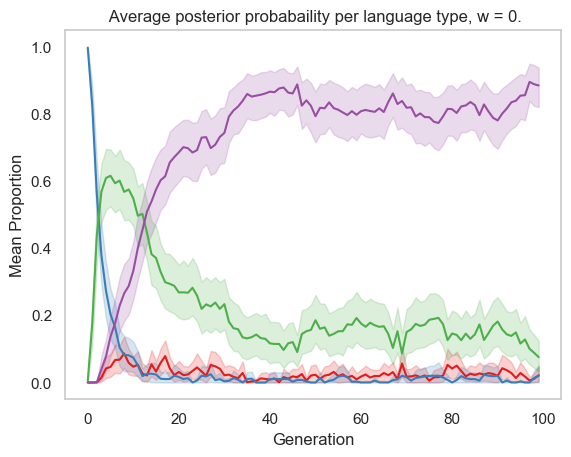

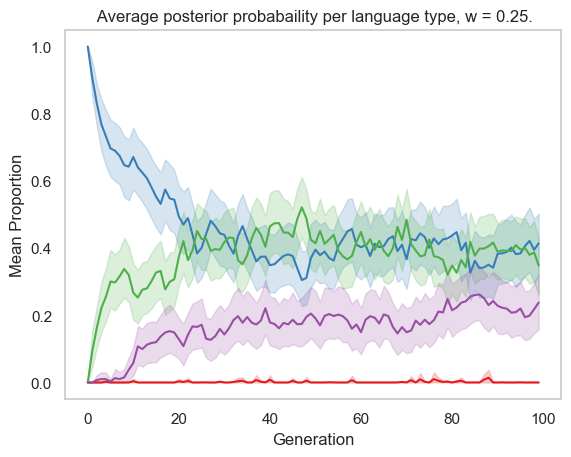

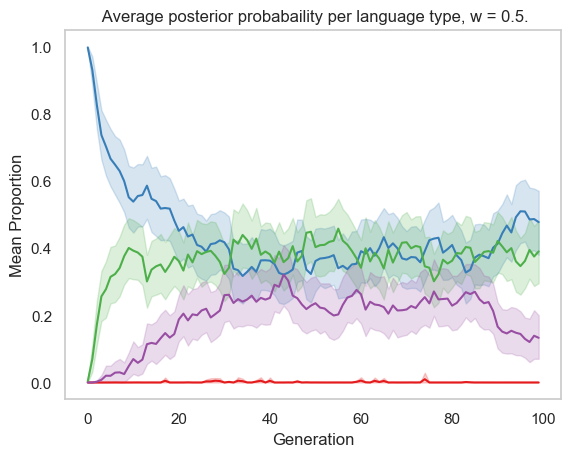

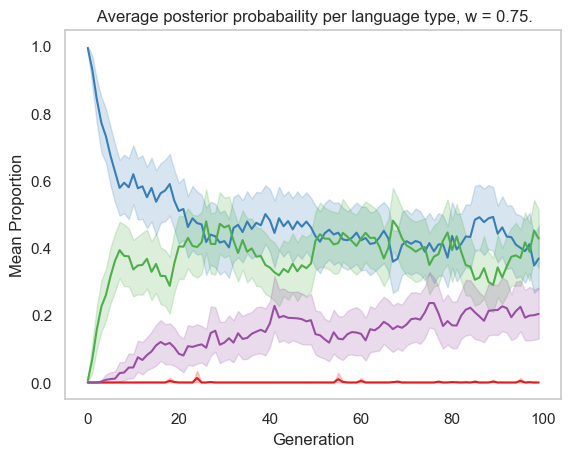

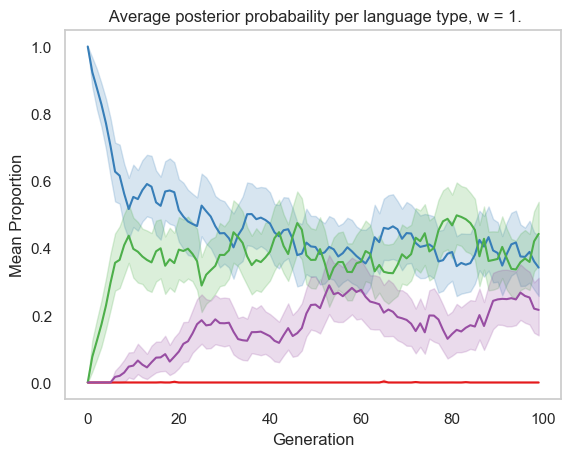

<Figure size 640x480 with 0 Axes>

In [24]:
# run this to do the simulations

list_weights = [0, 0.25, 0.5, 0.75, 1]

icon_score_data = []
posterior_results = []
for i in list_weights:
    results = more_simulations(i)
    # put results in list to be able to access it later
    posterior_results.append(results[0]) # posterior per language type data
    # for the iconicity data
    icon_score_data.append(results[1]) # iconicity data

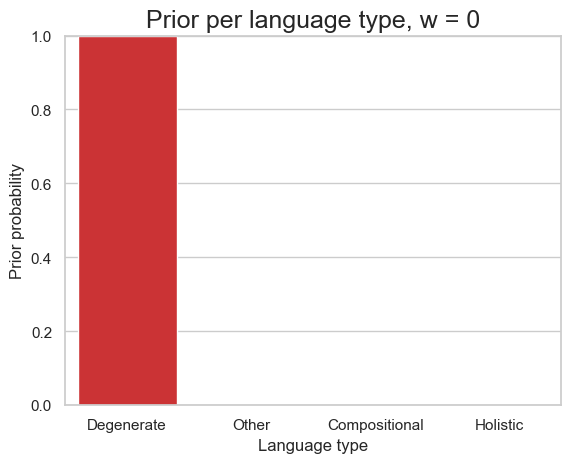

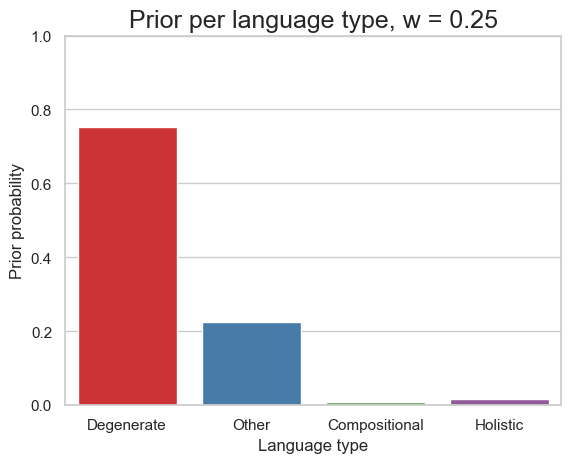

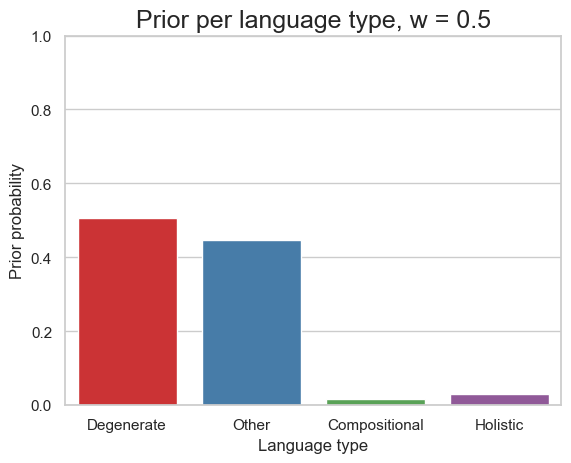

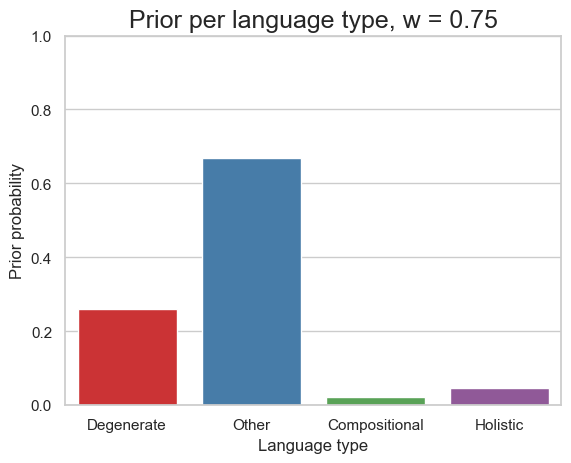

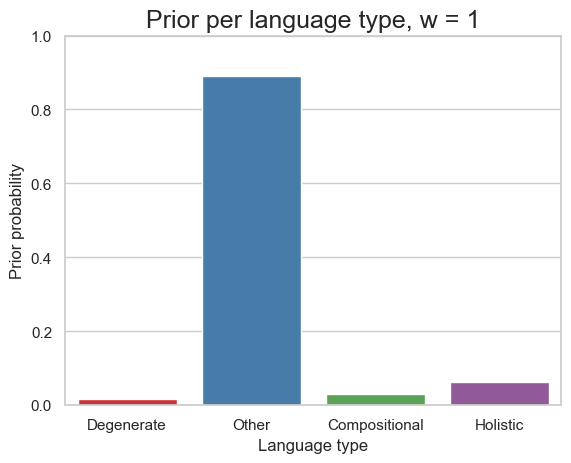

<Figure size 640x480 with 0 Axes>

In [20]:
# run this to plot the different priors

list_weights = [0, 0.25, 0.5, 0.75, 1]

for i in list_weights:
    plot_priors(i)

In [ ]:
# calculate average iconicity score of the produced data in each generation
# STILL TO DO
per_w = []
for i in icon_score_data:
    average = []
    for j in i:
        print(len(j))
        average.append((sum(j)/len(j)))
    per_w.append(average)

plt.plot(per_w)
plt.show()

print(min(average))
print(max(average))

average_average = sum(average) / len(average)
print(average_average)


In [30]:
def plot_old_posterior_graph(results, w):

    average_degenerate = []
    average_holistic = []
    average_other = []
    average_compositional = []

    
    for i in range(len(results[0])): # one simulation
        total_degenerate = 0
        total_holistic = 0
        total_other = 0
        total_compositional = 0
        for result in results:
            total_degenerate += result[i][0] # degenerate
            total_holistic += result[i][1]  # holistic
            total_other += result[i][2] # other
            total_compositional += result[i][3] # compositional

        average_degenerate.append(total_degenerate / len(results))
        average_holistic.append(total_holistic / len(results))
        average_other.append(total_other / len(results))
        average_compositional.append(total_compositional / len(results))

    colors = sns.color_palette('muted')    

    plt.plot(average_degenerate, color=colors[0], label='degenerate')
    plt.plot(average_holistic, color=colors[3], label='holistic')
    plt.plot(average_other, color=colors[1], label='other')
    plt.plot(average_compositional, color=colors[2], label='compositional')
    plt.xlabel('Generation')
    plt.ylabel('Mean Proportion')
    plt.title(f' Average posterior probabaility per language type, w = {w}.' )
    plt.legend(bbox_to_anchor=(4.04, 1), borderaxespad=0)
    plt.grid()

    plt.savefig(f"l_and_e_partly_iconic-initial{w}.png", dpi=1000, bbox_inches="tight")

    return

['degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate', 'holistic', 'other', 'compositional', 'degenerate

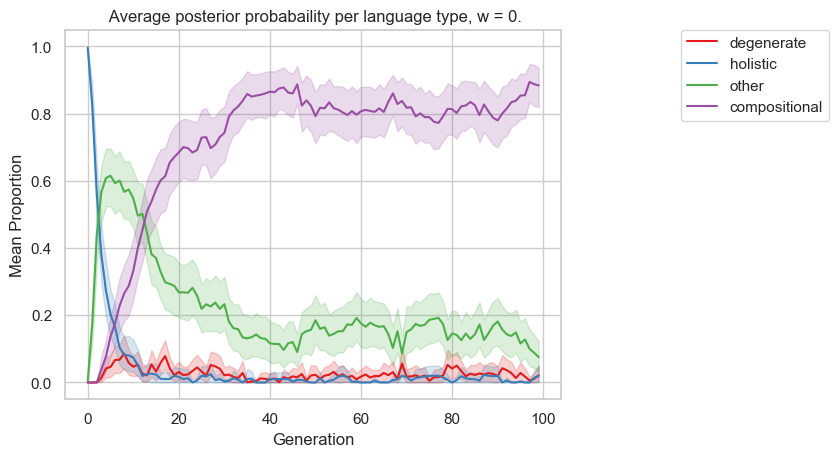

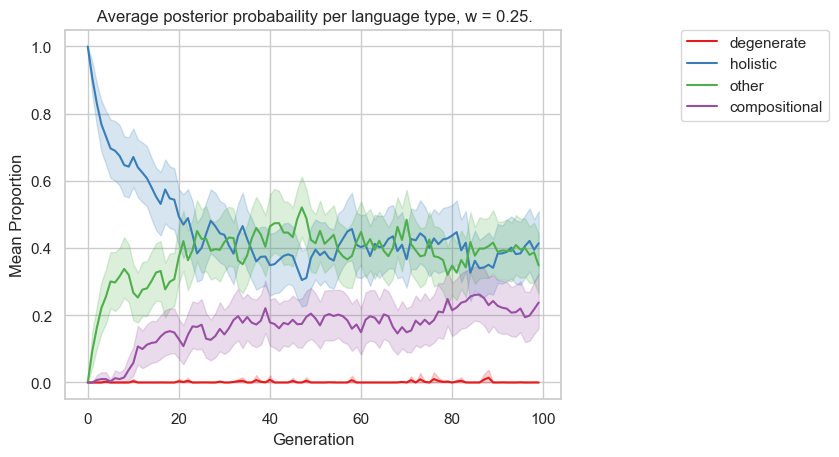

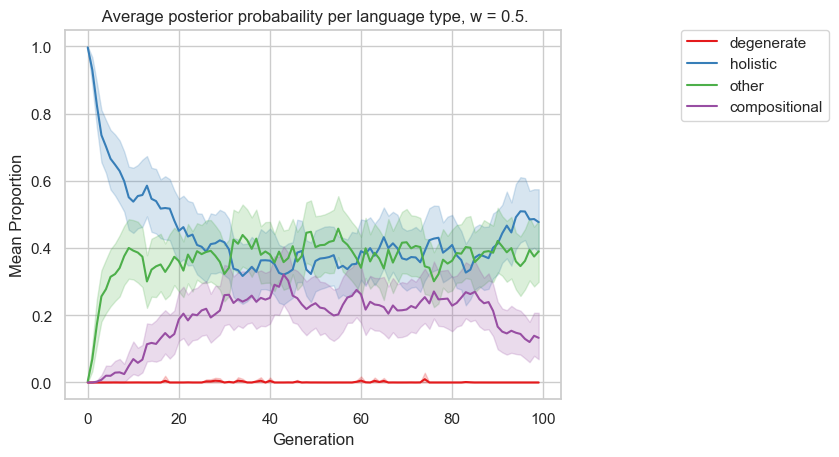

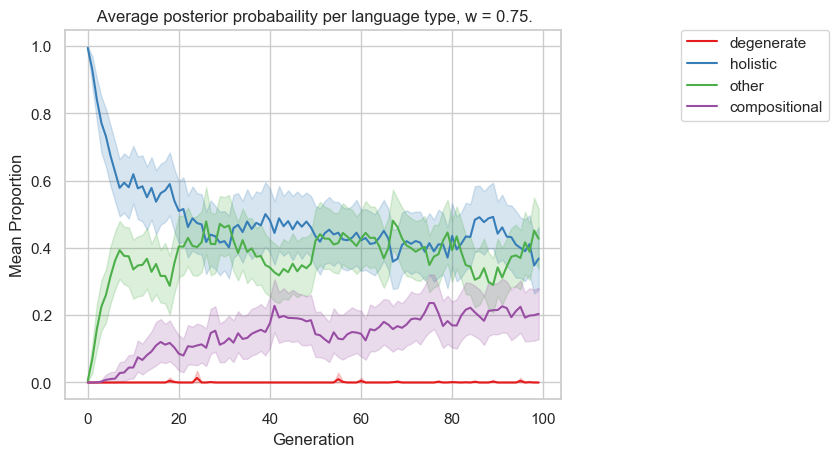

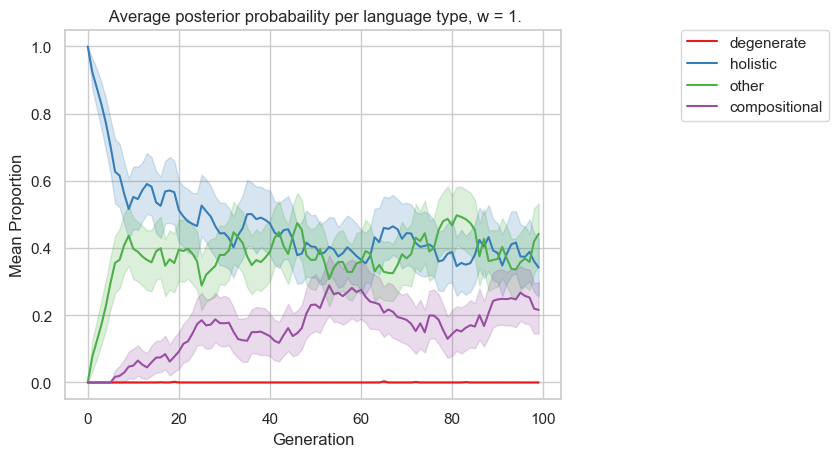

<Figure size 640x480 with 0 Axes>

In [34]:
for i in range(len(posterior_results)):
    if i == 0:
        plot_posterior_graph(posterior_results[i], 0)
    elif i == 1:
        plot_posterior_graph(posterior_results[i], 0.25)
    elif i == 2:
        plot_posterior_graph(posterior_results[i], 0.5)
    elif i == 3:
        plot_posterior_graph(posterior_results[i], 0.75)
    elif i == 4:
        plot_posterior_graph(posterior_results[i], 1)